In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("insurance.csv")

In [3]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
df.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [11]:
obj= df.select_dtypes("O")

In [12]:
for i in obj.columns:
    print(obj[i].value_counts())
    print("---------------------------")

male      676
female    662
Name: sex, dtype: int64
---------------------------
no     1064
yes     274
Name: smoker, dtype: int64
---------------------------
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
---------------------------


In [13]:
df["sex"]= df["sex"].map({"female":0,"male":1})

In [14]:
df["smoker"]= df["smoker"].map({"no":0,"yes":1})

In [15]:
df["region"]= df["region"].map({"southeast":1,"southwest":2,"northwest":3,"northeast":4})

In [16]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,2,16884.9240
1,18,1,33.77,1,0,1,1725.5523


In [17]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [18]:
X= df.drop("charges",axis=1)
y= df["charges"]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [24]:
mo= {"Linear_Regression":LinearRegression(),
    "Support_vector_regression":SVR(),
    "Random_Forest_regression":RandomForestRegressor(n_estimators=60),
    "Decision_tree_regressor":DecisionTreeRegressor(),
    "Gradient_boosting": GradientBoostingRegressor()}

In [25]:
def fit_score(model,x_train,x_test,y_train,y_test):
    
    test_score={}
    train_score={}
    y_train_pred={}
    y_test_pred={}
    
    for name, i in model.items():
        i.fit(x_train,y_train)
        
        test_score[name]= i.score(x_test,y_test)
        train_score[name]= i.score(x_train,y_train)
        y_train_pred[name]= i.predict(X_train)
        y_test_pred[name]= i.predict(X_test)
        
        
    test= pd.DataFrame(test_score,index=["Test_Accuracy"]).transpose()
    test["Train_Accuracy"]=train_score.values()
    predict=pd.DataFrame(y_test_pred)
    predict["Actual_value"]= np.array(y_test)
    return test, predict

In [26]:
test, predict= fit_score(mo,x_train=X_train,x_test=X_test,y_train=y_train,y_test=y_test)

In [27]:
test["Difference"]= test["Test_Accuracy"]-test["Train_Accuracy"]

<Figure size 864x576 with 0 Axes>

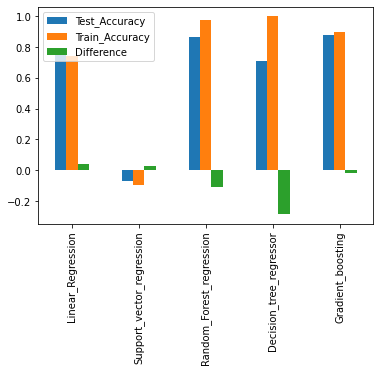

In [28]:
plt.figure(figsize=(12,8))
test.plot.bar()
plt.legend(loc=2);

In [29]:
test["Difference"]= test["Difference"]*100

In [30]:
test

,Test_Accuracy,Train_Accuracy,Difference
Linear_Regression,0.783928,0.741570,4.235798
Support_vector_regression,-0.072299,-0.097740,2.544168
Random_Forest_regression,0.865741,0.973940,-10.819903
Decision_tree_regressor,0.712190,0.998308,-28.611787
Gradient_boosting,0.879013,0.900000,-2.098734


In [31]:
gr= GradientBoostingRegressor().fit(X_train,y_train)

In [32]:
gr.score(X_test,y_test)

0.8790120344756222

In [33]:
gr.score(X_train,y_train)

0.9000003074104438

In [34]:
data = {'age' : 40,
        'sex' : 1,
        'bmi' : 40.30,
        'children' : 4,
        'smoker' : 1,
        'region' : 2}

In [35]:
new= pd.DataFrame(data,index=[0])

In [36]:
new

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [37]:
predict= gr.predict(new)
"Medical Insurance cost for New Customer is {}".format(predict[0])

'Medical Insurance cost for New Customer is 43262.521249716054'

In [38]:
gr= GradientBoostingRegressor().fit(X,y)

In [39]:
import joblib

In [40]:
joblib.dump(gr,"Gradient_boosting_insurance")

['Gradient_boosting_insurance']

In [41]:
model= joblib.load('Gradient_boosting_insurance')

In [42]:
model.predict(new)

array([41794.59038109])

In [43]:
new

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [44]:
from tkinter import *
import joblib

In [45]:
def show_price():
    
    p1= float(e1.get())
    p2= float(e2.get())
    p3= float(e3.get())
    p4= float(e4.get())
    p5= float(e5.get())
    p6= float(e6.get())
    
    model= joblib.load('Gradient_boosting_insurance')
    result=model.predict([[p1,p2,p3,p4,p5,p6]])
    
    Label(master,text="Insurance cost").grid(row=7)
    Label(master,text=result).grid(row=8)



master=Tk()
master.title(" *Insurance prediction *")

label= Label(master,text="Insurance cost prediction", bg= "yellow", fg="black").grid(row=0,columnspan=2)

Label(master,text="Enter your Age").grid(row=1)
Label(master,text="Male or Female [1/0]").grid(row=2)
Label(master,text="Enter your BMI").grid(row=3)
Label(master,text="Enter your Children").grid(row=4)
Label(master,text="Smoker Yes or No [1/0]").grid(row=5)
Label(master,text="Region[1-4]").grid(row=6)

e1= Entry(master)
e2= Entry(master)
e3= Entry(master)
e4= Entry(master)
e5= Entry(master)
e6= Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)

Button(master,text="Predict cost",command=show_price).grid()

mainloop()